# Dataset Information
Ballji Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

# Variable	Description
Loan_ID 	Unique Loan ID
Gender	    Male/ Female
Married	   Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	Loan approved (Y/N)

# 1)  Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
data = pd.read_csv(r"C:\Users\ALI\Desktop\Bank_loan_approved_not_Approved\loan.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# 2) Data Preprocessing

In [8]:
# find null value
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# filling mising value in numerical variable in dataframe with help of ---mean()
# null_numerical_var = ['LoanAmount','Loan_Amount_Term ','Credit_History']

data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())


In [16]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
# filling mising value in categorical  variable in dataframe with help of ---mode()
# categorical_var=['Gender', 'Married' ,'Dependents', 'Self_Employed'] 
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])


In [25]:
#data['Gender'].mode()[0]

data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 3) EDA (Exploratory Data Analysis)
    # visualize categorical variable

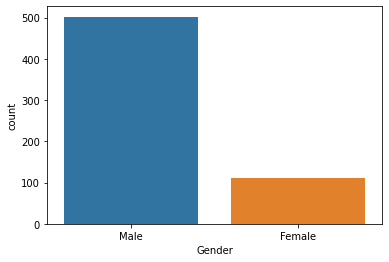

In [28]:
sns.countplot(data['Gender'])

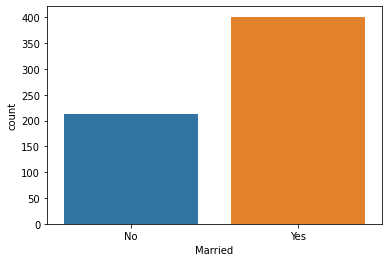

In [29]:
sns.countplot(data['Married'])

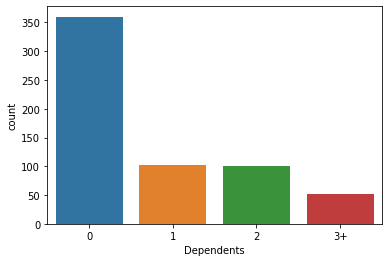

In [30]:
sns.countplot(data['Dependents'])

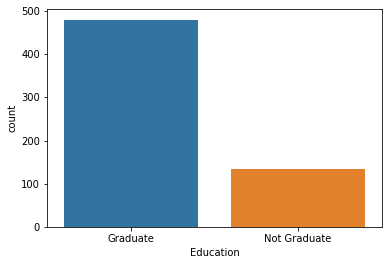

In [31]:
sns.countplot(data['Education'])

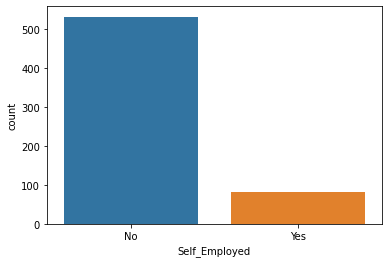

In [34]:
sns.countplot(data['Self_Employed'])

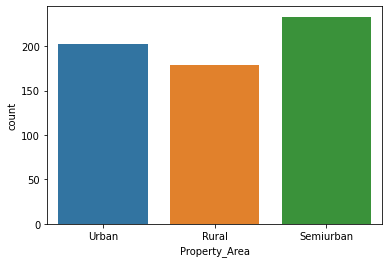

In [42]:
sns.countplot(data['Property_Area'])

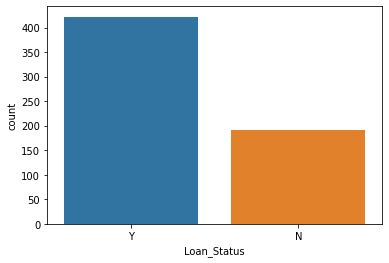

In [43]:
sns.countplot(data['Loan_Status'])

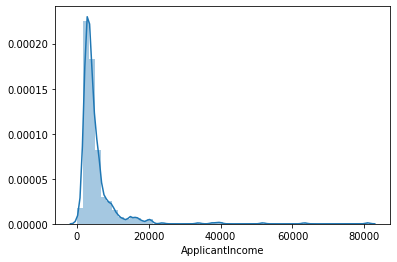

In [36]:
# visualition for numerical attribute
sns.distplot(data['ApplicantIncome'])

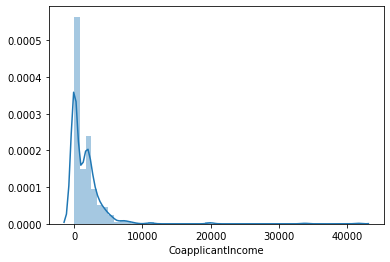

In [37]:
sns.distplot(data['CoapplicantIncome'])

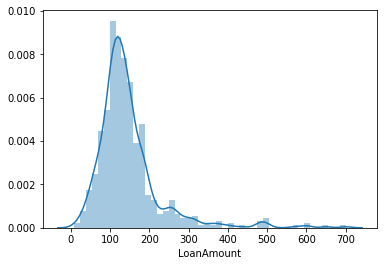

In [38]:
sns.distplot(data['LoanAmount'])

C:\Users\ALI\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


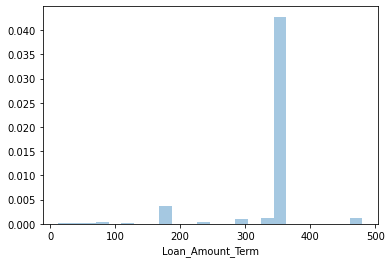

In [40]:
sns.distplot(data['Loan_Amount_Term'])

C:\Users\ALI\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


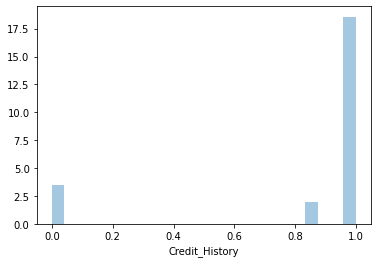

In [41]:
sns.distplot(data['Credit_History'])

# Add new colunm --> Total_Income= ApplicantIncome 	+CoapplicantIncome


In [44]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']

In [45]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


# Gonna Apply  log transformation in numerical var

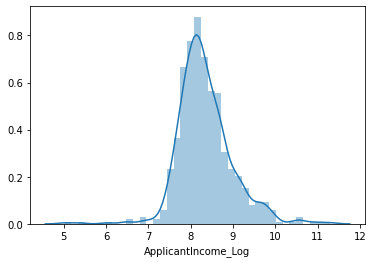

In [47]:
data['ApplicantIncome_Log']=np.log(data['ApplicantIncome']+1)
sns.distplot(data['ApplicantIncome_Log'])

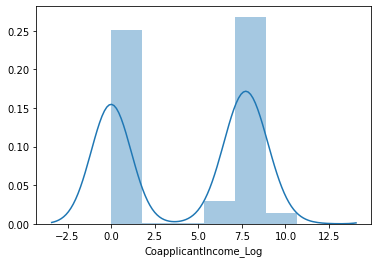

In [48]:
data['CoapplicantIncome_Log'] = np.log(data['CoapplicantIncome']+1)
sns.distplot(data['CoapplicantIncome_Log'])


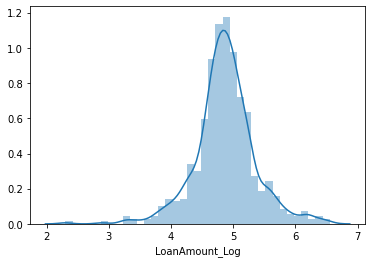

In [50]:
data['LoanAmount_Log']=np.log(data['LoanAmount']+1)
sns.distplot(data['LoanAmount_Log'])
    

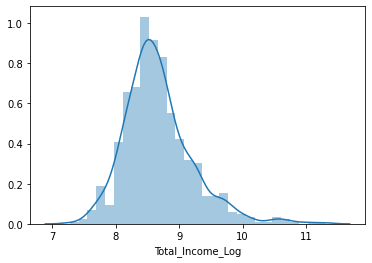

In [51]:
data['Total_Income_Log']=np.log(data["Total_Income"]+1)
sns.distplot(data['Total_Income_Log'])

# 4) Correlation 

In [52]:
corr = data.corr()

In [53]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Total_Income_Log
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.893037,0.790658,-0.250433,0.436606,0.717856
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.342781,-0.237860,0.573648,0.204492,0.383831
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,0.620102,0.551656,0.047522,0.897671,0.687560
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.069830,-0.030741,0.013613,0.085940,-0.055321
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.014447,0.019183,0.002384,-0.024909,0.019154
Total_Income,0.893037,0.342781,0.620102,-0.069830,-0.014447,1.000000,0.640090,0.023028,0.505622,0.852901
ApplicantIncome_Log,0.790658,-0.237860,0.551656,-0.030741,0.019183,0.640090,1.000000,-0.368258,0.492560,0.740402
CoapplicantIncome_Log,-0.250433,0.573648,0.047522,0.013613,0.002384,0.023028,-0.368258,1.000000,0.130524,0.149070
LoanAmount_Log,0.436606,0.204492,0.897671,0.085940,-0.024909,0.505622,0.492560,0.130524,1.000000,0.658957
Total_Income_Log,0.717856,0.383831,0.687560,-0.055321,0.019154,0.852901,0.740402,0.149070,0.658957,1.000000


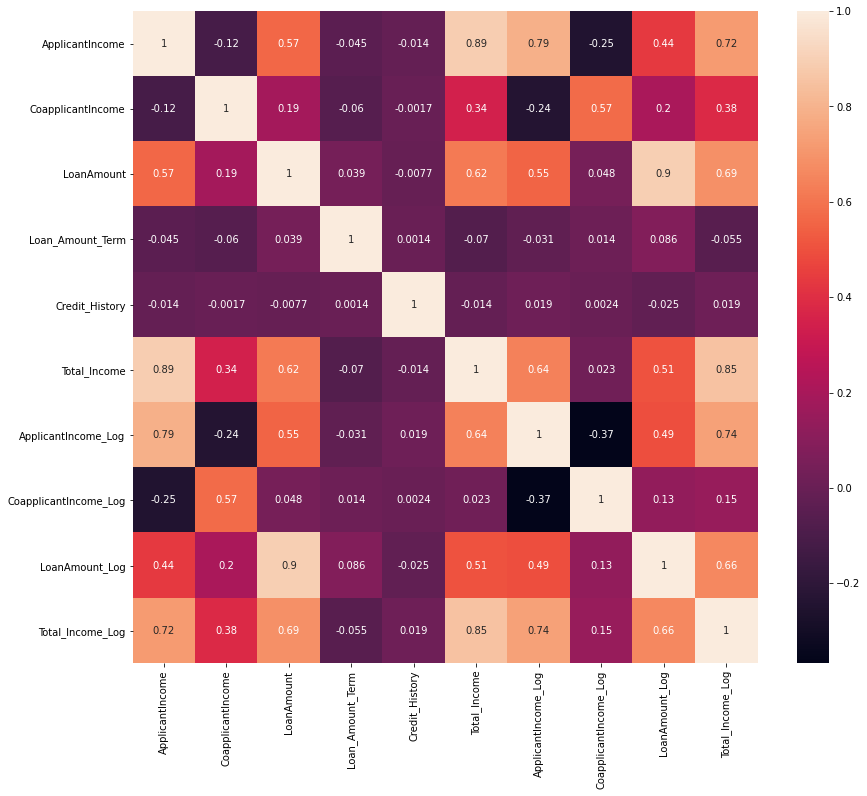

In [56]:
plt.figure(figsize=(14,12))
sns.heatmap(data=corr,annot=True)

# Drop Unnecessary Column

In [81]:
waste_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncome_Log']
data.drop(columns=waste_col,axis=1,inplace=True)


In [95]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,8.699681


# Convert Categorical into Numerical 

In [96]:
categ_col=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for col in categ_col:
    data[col]=le.fit_transform(data[col])


In [97]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674197,4.993232,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,8.699681


#  Splitting Train Test  data

In [108]:
X=data.drop(columns=['Loan_Status'],axis=1).values
y=data['Loan_Status'].values



In [110]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=0)

In [98]:
x_test


array([[1, 0, '0', ..., 8.865876285425417, 4.442651256490317,
        8.865876285425417],
       [0, 0, '0', ..., 8.350193650720067, 4.727387818712341,
        8.350193650720067],
       [1, 1, '0', ..., 8.721602344674197, 5.783825182329737,
        9.214332393245721],
       ...,
       [1, 1, '0', ..., 9.5876803163585, 6.07993319509559,
        9.5876803163585],
       [1, 1, '3+', ..., 7.988882253309227, 4.2626798770413155,
        8.436416881388949],
       [1, 1, '1', ..., 7.3938782901077555, 4.574710978503383,
        8.14002395246292]], dtype=object)

# MOdel Training

In [122]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [126]:
  # Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

In [127]:
  # Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

In [128]:
  # RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [129]:
  # Extra Tree Classifier
model = ExtraTreesClassifier()
classify(model, X, y)

In [ ]:
# RandomTree Classifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Confusion Matrix
A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [131]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
sns.heatmap(cm, annot=True)